<a href="https://colab.research.google.com/github/sysiphe0/exercise_ml/blob/main/%EC%8B%9C%EA%B3%84%EC%97%B4_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
bitcoin_df = pd.read_csv("/content/drive/My Drive/market-price.csv", names = ['day', 'price'])
bitcoin_df.head()

,day,price
0,2017-08-27 00:00:00,4354.308333
1,2017-08-28 00:00:00,4391.673517
2,2017-08-29 00:00:00,4607.985450
3,2017-08-30 00:00:00,4594.987850
4,2017-08-31 00:00:00,4748.255000


시계열차트의 x축은 'day'이고, y축은 'price'가 될겁니다.

index : day

value : price

day는 단위가 '하루'이기에, 시계열 피처단위로 바꿉니다.

In [7]:
bitcoin_df['day'] = pd.to_datetime(bitcoin_df['day'])
bitcoin_df.head()

,day,price
0,2017-08-27,4354.308333
1,2017-08-28,4391.673517
2,2017-08-29,4607.985450
3,2017-08-30,4594.987850
4,2017-08-31,4748.255000


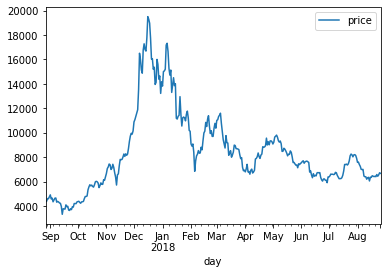

In [9]:
# 이제 day를 index로 지정합니다.
bitcoin_df.index = bitcoin_df['day']
bitcoin_df.set_index('day', inplace=True)
# 차트 확인
bitcoin_df.plot()
plt.show()

차트의 x축 시간만큼을 토대로, 이후 어떤 수치로 변할지 예측합니다.

파이썬 라이브러리 중 대표적으로 쓰이는 ARIMA를 활용합니다. (상세 알고리즘은 생략합니다.)

 

ARIMA(Autoregressvie integrated MovingAverage)

AR(자기상관) : 이전의 값이 이후의 값에 영향을 미치고 있는 상황

MA(이동평균) : 랜덤 변수의 평균값이 지속적으로 증가하거나 감소하는 추세

 

차분은 비정상성을 정상성으로 만들기 위해, 관측값들의 차이를 계산하는 것.

(아래 그림처럼 비정상성에서 정상성으로)

In [10]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

# (AR=2, 차분=1, MA=2) 파라미터로 ARIMA 모델을 학습합니다.
model = ARIMA(bitcoin_df.price.values, order=(2,1,2))

#trend : constant를 가지고 있는지, c - constant / nc - no constant
#disp : 수렴 정보를 나타냄
model_fit = model.fit(trend='c', full_output=True, disp=True)
print(model_fit.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  364
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2780.074
Method:                       css-mle   S.D. of innovations            501.536
Date:                Sun, 13 Dec 2020   AIC                           5572.148
Time:                        01:26:49   BIC                           5595.531
Sample:                             1   HQIC                          5581.442
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.3906     26.944      0.237      0.813     -46.419      59.200
ar.L1.D.y      0.4496      0.029     15.512      0.000       0.393       0.506
ar.L2.D.y     -0.9622      0.023    -42.314      0.0